In [7]:
#Installing necessary packages
!pip install emoji
!pip install re


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Preprocessing
import emoji
import re
import json
with open("C:/Users/jayan/Downloads/MMHS150K/MMHS150K_GT.json") as f:
  data = json.load(f)

for key in data.keys():
        data[key]['tweet_text'] = emoji.demojize(data[key]['tweet_text']) 
        data[key]['tweet_text'] = re.sub(r'http\S+', '',data[key]['tweet_text'])
        data[key]['tweet_text'] = re.sub(r'@\S+', '',data[key]['tweet_text'])
        data[key]['tweet_text'] = re.sub(r'#', '',data[key]['tweet_text'])
        data[key]['tweet_text'] = re.sub(r'_', ' ',data[key]['tweet_text'])
        if data[key]['labels']==[0,0,0]:
            data[key]['labels']=0
        else:
            data[key]['labels']=1



In [ ]:
#Output of initial preprocessing
with open("C:/Users/jayan/Downloads/MMHS150K/modified_data.json", "w") as outfile:
    json.dump(data, outfile)
for key, value in data.items():
    print(f"Key: {key}, Modified Tweet Text: {value['tweet_text']}, Modified Labels: {value['labels']}")


In [10]:
from pathlib                        import Path
from os                             import path
import numpy                        as np
import os
from PIL                            import Image

#We extract training tweet text, image text and image from the dataset files and form numpy array for all modalities

train_keys= open("C:/Users/jayan/Downloads/MMHS150K/splits/train_ids.txt")
train_keys= train_keys.read()
train_keys= train_keys.splitlines()

path1           = Path("C:/Users/jayan/Downloads/MMHS150K/img_resized")
path2           = Path("C:/Users/jayan/Downloads/MMHS150K/img_txt")
y_train_t       = np.zeros((134823,1))
docs_train_t    = ["" for x in range(134823)]
docs_train_img  = ["" for x in range(134823)]
image_train     = np.zeros((134823,32,32,3))
null           = np.zeros((32,32))
zeros          = np.zeros((32,32))
i=0
for keys in train_keys:
    path_im          = ""
    path_im_txt      = ""
    a                = ""
    b                = ""
    y_train_t[i]     = data[keys]['labels']
    docs_train_t[i]  = data[keys]['tweet_text']
    a                = a.join([keys, ".jpg"])
    path_im          = os.path.join(path1, a)
    img_t            = Image.open(path_im)
    if img_t.mode!='RGB':
        null=img_t.resize((32,32))
        image_train[i]= np.stack([null, zeros, zeros], axis=-1)
    else:
        image_train[i]= img_t.resize((32,32))
    b                = b.join([keys, ".json"])
    path_im_txt      = os.path.join(path2, b)
    if path.exists(path_im_txt):
        img_text         = json.load(open(path_im_txt))
        docs_train_img[i] = img_text['img_text']
    i=i+1

In [11]:
for i in range(10):  # Print the first 10 samples as an example
    print(f"Sample {i+1} - Label: {y_train_t[i]}, Tweet Text: {docs_train_t[i]}, Image Text: {docs_train_img[i]}")


Sample 1 - Label: [1.], Tweet Text: Thats  what u call a redneck lol , Image Text: a bunch c 
Sample 2 - Label: [1.], Tweet Text:   Nigga forgot mortal :loudly crying face: mortal you were wilding at the parade , Image Text: nericansForTruth.org 
Sample 3 - Label: [1.], Tweet Text: Nigga if ain't interested in playing for the team just fake an injury. WOLMUN , Image Text: CHEVROLET 
Sample 4 - Label: [1.], Tweet Text: Love a BBC  So faggot slut , Image Text: 
Sample 5 - Label: [1.], Tweet Text:  leaked Pics of Dog Nigga live action movie. I have to say its looking good , Image Text: 
Sample 6 - Label: [1.], Tweet Text: "That boy Morata might as well be a fucking nigger" , Image Text: 
Sample 7 - Label: [1.], Tweet Text: I GOT HOOOOOOEESSSSS CAAALLLLLLING A YOUNG NIGGA PHOOOONNEEE , Image Text: 
Sample 8 - Label: [1.], Tweet Text: my dyke brain , Image Text: trixie as a cheerleader trixie a a- cheerleader trixie as a cheerleader thiddies trixie as a cheerleader trixie as a cheerleader 


In [12]:
np.save('C:/Users/jayan/Downloads/MMHS150K/y_train_t.npy', y_train_t)
np.save('C:/Users/jayan/Downloads/MMHS150K/docs_train_t.npy', docs_train_t)
np.save('C:/Users/jayan/Downloads/MMHS150K/docs_train_img.npy', docs_train_img)
np.save('C:/Users/jayan/Downloads/MMHS150K/image_train.npy', image_train)


In [13]:
#We extract test tweet text, image text and image from the dataset files and form numpy array for all modalities

test_keys= open("C:/Users/jayan/Downloads/MMHS150K/splits/test_ids.txt")
test_keys= test_keys.read()
test_keys= test_keys.splitlines()

path1           = Path("C:/Users/jayan/Downloads/MMHS150K/img_resized")
path2           = Path("C:/Users/jayan/Downloads/MMHS150K/img_txt")
y_test_t       = np.zeros((10000,1))
docs_test_t    = ["" for x in range(10000)]
docs_test_img  = ["" for x in range(10000)]
image_test     = np.zeros((10000,32,32,3))
null           = np.zeros((32,32))
zeros          = np.zeros((32,32))
i=0
for keys in test_keys:
    path_im          = ""
    path_im_txt      = ""
    a                = ""
    b                = ""
    y_test_t[i]     = data[keys]['labels']
    docs_test_t[i]  = data[keys]['tweet_text']
    a                = a.join([keys, ".jpg"])
    path_im          = os.path.join(path1, a)
    img_t            = Image.open(path_im)
    if img_t.mode!='RGB':
        null=img_t.resize((32,32))
        image_test[i]= np.stack([null, zeros, zeros], axis=-1)
    else:
        image_test[i]   = img_t.resize((32,32))
    b                = b.join([keys, ".json"])
    path_im_txt      = os.path.join(path2, b)
    if path.exists(path_im_txt):
        img_text         = json.load(open(path_im_txt))
        docs_test_img[i] = img_text['img_text']
    i=i+1

In [14]:
for i in range(10):  # Print the first 10 samples as an example
    print(f"Sample {i+1} - Label: {y_test_t[i]}, Tweet Text: {docs_test_t[i]}, Image Text: {docs_test_img[i]}")
np.save('C:/Users/jayan/Downloads/MMHS150K/y_test_t.npy', y_test_t)
np.save('C:/Users/jayan/Downloads/MMHS150K/docs_test_t.npy', docs_test_t)
np.save('C:/Users/jayan/Downloads/MMHS150K/docs_test_img.npy', docs_test_img)
np.save('C:/Users/jayan/Downloads/MMHS150K/image_test.npy', image_test)

Sample 1 - Label: [1.], Tweet Text:    You’re a disgrace to black people and women everywhere, you pathetic twat. , Image Text: tastes FUCK TRUMP YOU LIKE TOO! 
Sample 2 - Label: [1.], Tweet Text:  I have a conservative victim card; it will protect her from tofu. , Image Text: CONSERVATIVE VICTIM CARD Check one or more options below choose a scapegoat for your unhappiness and overall failure in life Minorities Immigrants Non-Christians Liberals_The Media The Deep State 
Sample 3 - Label: [1.], Tweet Text:   I know this ain’t the nigga talkin to me bout violence in the streets :face with tears of joy: , Image Text: 
Sample 4 - Label: [1.], Tweet Text:  Oh no sis she pulled the mf race card whew , Image Text: Instagram 10:46 AM Tweet Yoongi's Negress | LOONA's Momage. @VocalQueenNako You're not Black, so anything you say/ show me is irrelevant (especially since Spin is ran by coons) lil egg I shadowbanned @trivialways Replying to @VocalQueenNako Maybe you should check your ears 48. Rap M

In [15]:
from keras.utils.np_utils           import to_categorical
import keras.backend                as K
from tensorflow import keras
#We change the labels into 2 categories 
num_classes = 2
y_train_t   = keras.utils.to_categorical(y_train_t, num_classes)
y_test_t    = keras.utils.to_categorical(y_test_t, num_classes)

In [17]:
from keras.preprocessing.text       import Tokenizer
#c.NotebookApp.iopub_data_rate_limit = 10000000
#Tweet text pre-processing
#Train_Tweet text tokenizing
t = Tokenizer()
t.fit_on_texts(docs_train_t)
vocab_size_t = len(t.word_index) + 1
encoded_docs_train_t = t.texts_to_sequences(docs_train_t)
print(encoded_docs_train_t[:5])



[[587, 33, 66, 149, 2, 83, 127], [1, 754, 6210, 36, 32, 3, 6210, 9, 439, 3092, 38, 4, 8033], [1, 60, 381, 3368, 20, 242, 22, 4, 681, 27, 599, 112, 6976, 24935], [95, 2, 1572, 54, 39, 729], [9507, 6211, 7, 388, 1, 296, 1401, 376, 8, 79, 10, 89, 279, 201, 121]]


In [18]:
#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150
padded_docs_train_t = pad_sequences(encoded_docs_train_t, maxlen=max_length, padding='post')
print(padded_docs_train_t[:10])

[[ 587   33   66 ...    0    0    0]
 [   1  754 6210 ...    0    0    0]
 [   1   60  381 ...    0    0    0]
 ...
 [  11   29  961 ...    0    0    0]
 [  11 5603  388 ...    0    0    0]
 [  73   96    0 ...    0    0    0]]


In [20]:
from numpy                          import asarray
#Preparing test data
encoded_docs_test_t = t.texts_to_sequences(docs_test_t)
padded_docs_test_t = pad_sequences(encoded_docs_test_t, maxlen=150, padding='post')

embeddings_index = dict()
f = open("C:/Users/jayan/OneDrive/Documents/glove.6B.100d.txt/glove.6B.100d.txt", encoding="utf8")
for line in f:
        values = line.split()
        word = values[0]
        coefs = asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()



#Creating Matrix Embedding for our tweet text dictionary
embedding_matrix_t = np.zeros((vocab_size_t+1, 100))
for word, i in t.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
                embedding_matrix_t[i] = embedding_vector

In [ ]:
print("encoded_docs_test_t:", encoded_docs_test_t)
print("padded_docs_test_t:", padded_docs_test_t)
print("embedding_matrix_t:", embedding_matrix_t)

In [21]:
#Creating Matrix Embedding for our tweet text dictionary
embedding_matrix_t = np.zeros((vocab_size_t+1, 100))
for word, i in t.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
                embedding_matrix_t[i] = embedding_vector

In [21]:
print("embedding_matrix:",embedding_matrix_t)

embedding_matrix: [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.34557    -0.38619     0.27454001 ... -0.93276    -0.56418997
  -0.11127   ]
 [-0.27085999  0.044006   -0.02026    ... -0.4923      0.63687003
   0.23642001]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


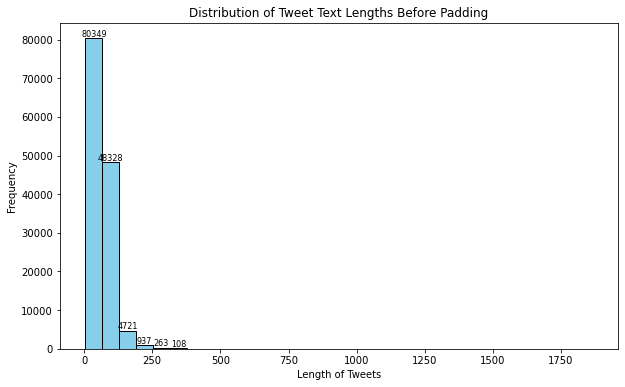

In [69]:
#Before padding length
import matplotlib.pyplot as plt

# Calculate the lengths of each tweet
tweet_lengths = [len(text) for text in docs_train_t]

# Plot the histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tweet Text Lengths Before Padding')
plt.xlabel('Length of Tweets')
plt.ylabel('Frequency')

# Annotations on top of the bars 
for i, count in enumerate(counts):
    if count>51:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count + 5, str(int(count)),
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()


In [23]:
print("encoded image:",encoded_docs_train_img[:10])
print("image:",padded_docs_train_img)

encoded image: [[2, 3176, 116], [32980, 498], [6042], [], [], [], [], [10953, 89, 2, 10954, 10953, 2, 2, 10954, 10953, 89, 2, 10954, 32981, 10953, 89, 2, 10954, 10953, 89, 2, 10954], [], [2089, 12848]]
image: [[    2  3176   116 ...     0     0     0]
 [32980   498     0 ...     0     0     0]
 [ 6042     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [15058 19153     0 ...     0     0     0]]


In [24]:
#Preparing test data for image text
encoded_docs_test_img = t1.texts_to_sequences(docs_test_img)
padded_docs_test_img = pad_sequences(encoded_docs_test_img, maxlen=max_length, padding='post')

In [25]:
#Creating Matrix Embedding
embedding_matrix_im = np.zeros((vocab_size_im+1, 100))
for word, i in t1.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
                embedding_matrix_im[i] = embedding_vector


max_words_im =vocab_size_im+1
max_words_t =vocab_size_t+1

print(embedding_vector)
print(embedding_matrix_im)
print(max_words_im)
print(max_words_t)

None
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.27085999  0.044006   -0.02026    ... -0.4923      0.63687003
   0.23642001]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
100179
58247


In [26]:
#Train_Image pre-processing
from skimage.color                  import rgb2gray

image_train_g= np.zeros((134823,32,32,1))
image_train_g = rgb2gray(image_train)
image_train_g=image_train_g.reshape((134823,32,32,1))

In [28]:
print(image_train_g)

[[[[209.8375]
   [211.6971]
   [216.6971]
   ...
   [120.6299]
   [119.6299]
   [118.6299]]

  [[222.1279]
   [214.3404]
   [219.625 ]
   ...
   [135.2732]
   [135.4895]
   [136.0607]]

  [[226.3404]
   [217.4125]
   [223.625 ]
   ...
   [136.9107]
   [138.2011]
   [139.0607]]

  ...

  [[129.2317]
   [130.8768]
   [130.448 ]
   ...
   [122.0268]
   [126.8864]
   [116.8105]]

  [[117.7326]
   [115.3797]
   [116.2393]
   ...
   [112.7364]
   [122.1654]
   [124.7366]]

  [[107.3701]
   [107.3797]
   [114.8143]
   ...
   [102.8864]
   [118.3134]
   [119.8808]]]


 [[[183.6203]
   [194.6203]
   [192.6433]
   ...
   [233.2808]
   [244.4346]
   [229.575 ]]

  [[194.1308]
   [182.4741]
   [167.7913]
   ...
   [159.1274]
   [171.5812]
   [159.5051]]

  [[158.5462]
   [157.1569]
   [180.4346]
   ...
   [108.204 ]
   [102.1857]
   [109.6935]]

  ...

  [[129.7759]
   [125.3509]
   [121.0835]
   ...
   [ 51.8672]
   [ 48.8672]
   [ 47.9393]]

  [[122.0797]
   [117.7989]
   [122.2277]
   ...
   [ 

In [27]:
#Test_Image pre-processing
import numpy as np
from skimage.color                  import rgb2gray

image_test_g= np.zeros((10000,32,32,1))
image_test_g = rgb2gray(image_test)
image_test_g=image_test_g.reshape((10000,32,32,1))

print(image_test_g)

[[[[111.6471]
   [120.7875]
   [138.5047]
   ...
   [129.425 ]
   [120.0304]
   [125.6282]]

  [[149.5654]
   [181.8596]
   [126.4308]
   ...
   [143.9489]
   [149.5335]
   [159.6757]]

  [[161.1404]
   [165.9866]
   [138.1875]
   ...
   [121.0152]
   [137.1594]
   [ 80.1842]]

  ...

  [[ 27.1328]
   [ 27.1328]
   [ 25.4174]
   ...
   [ 64.1424]
   [ 75.8578]
   [ 88.7857]]

  [[ 30.8482]
   [ 34.5712]
   [ 43.0779]
   ...
   [ 81.9982]
   [ 87.9982]
   [ 92.2107]]

  [[105.9605]
   [133.173 ]
   [151.7442]
   ...
   [ 87.3549]
   [ 91.3511]
   [ 95.9203]]]


 [[[222.9873]
   [176.3614]
   [118.7826]
   ...
   [ 92.4288]
   [113.6317]
   [110.5462]]

  [[202.1469]
   [ 96.6518]
   [ 37.9605]
   ...
   [ 42.002 ]
   [ 48.4404]
   [ 38.9375]]

  [[186.5739]
   [116.5221]
   [135.8154]
   ...
   [ 21.0857]
   [ 21.2261]
   [ 24.0002]]

  ...

  [[176.9493]
   [182.0955]
   [175.0158]
   ...
   [ 67.3587]
   [ 77.7154]
   [ 81.5029]]

  [[176.9455]
   [185.6647]
   [172.4388]
   ...
   [ 

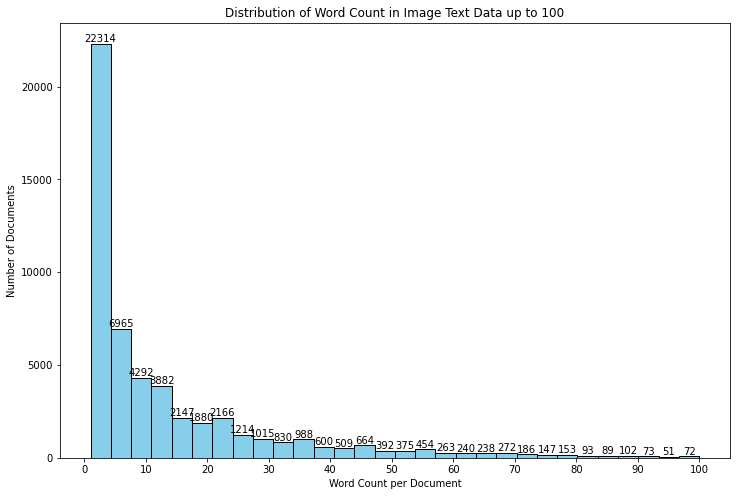

Vocabulary Size: 100178


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the frequency of each word in the training data
word_freq = [len(doc) for doc in encoded_docs_train_img]

# Set the maximum word count to display on the x-axis
max_word_count_to_display = 100

# Plot the histogram 
plt.figure(figsize=(12, 8))  
counts, bins, _ = plt.hist(word_freq, bins=30, range=(1, max_word_count_to_display), color='skyblue', edgecolor='black')
plt.xlabel('Word Count per Document')
plt.ylabel('Number of Documents')
plt.title(f'Distribution of Word Count in Image Text Data up to {max_word_count_to_display}')

#Annotations on top of the bars 
for i, count in enumerate(counts):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, count + 5, str(int(count)),
             ha='center', va='bottom', fontsize=10, color='black')

# Decreasing the number of x-axis ticks 
x_ticks = np.arange(0, max_word_count_to_display+1, 10)  
plt.xticks(x_ticks)

plt.show()

# Display the vocabulary size
print(f"Vocabulary Size: {vocab_size_im}")


In [62]:
import json

# Path to your original dataset
path_to_original_dataset = "C:/Users/jayan/Downloads/MMHS150K/MMHS150K_GT.json"

# Load the original data
with open(path_to_original_dataset, 'r') as file:
    original_data = json.load(file)

# Extract the tweet texts
original_docs_train_t = [original_data[key]['tweet_text'] for key in original_data]

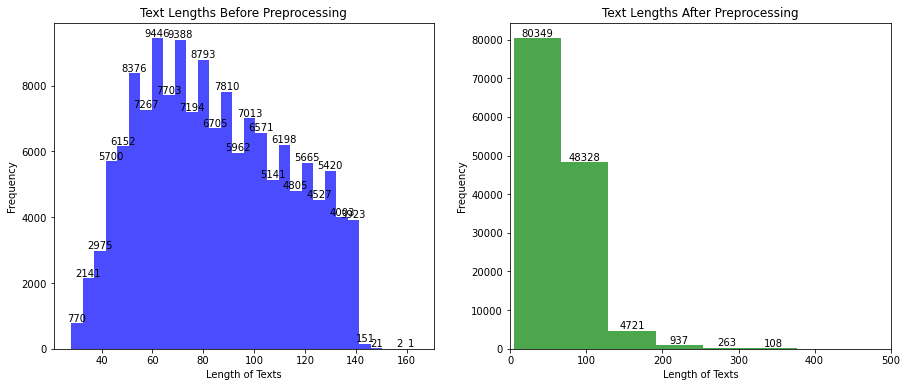

In [65]:
import matplotlib.pyplot as plt

original_text_lengths = [len(text) for text in original_docs_train_t]
processed_text_lengths = [len(text) for text in docs_train_t]

plt.figure(figsize=(15, 6))

# Plot for Text Lengths Before Preprocessing
plt.subplot(1, 2, 1)
counts1, bins1, _ = plt.hist(original_text_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Text Lengths Before Preprocessing')
plt.xlabel('Length of Texts')
plt.ylabel('Frequency')

#Annotations on top of the bars 
for i, count in enumerate(counts1):
    if count > 0:
        plt.text(bins1[i] + (bins1[i+1] - bins1[i]) / 2, count + 5, str(int(count)),
             ha='center', va='bottom', fontsize=10, color='black')

# Plot for Text Lengths After Preprocessing
plt.subplot(1, 2, 2)
counts2, bins2, _ = plt.hist(processed_text_lengths, bins=30, color='green', alpha=0.7)
plt.title('Text Lengths After Preprocessing')
plt.xlabel('Length of Texts')
plt.xlim(0, 500)
plt.ylabel('Frequency')

#Annotations on top of the bars 
for i, count in enumerate(counts2):
    if count>51:
        plt.text(bins2[i] + (bins2[i+1] - bins2[i]) / 2, count + 5, str(int(count)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [ ]:
#Wordcloud processing
from pathlib import Path
import numpy as np
import os
from PIL import Image
import json

train_keys = open("C:/Users/jayan/Downloads/MMHS150K/splits/train_ids.txt")
train_keys = train_keys.read()
train_keys = train_keys.splitlines()

path1 = Path("C:/Users/jayan/Downloads/MMHS150K/img_resized")
path2 = Path("C:/Users/jayan/Downloads/MMHS150K/img_txt")
y_train_t = np.zeros((134823, 1))
docs_train_t = ["" for x in range(134823)]
docs_train_img = ["" for x in range(134823)]
image_train = np.zeros((134823, 32, 32, 3))
null = np.zeros((32, 32))
zeros = np.zeros((32, 32))
i = 0

for keys in train_keys:
    path_im = ""
    path_im_txt = ""
    a = ""
    b = ""

    # Load data from JSON file
    b = b.join([keys, ".json"])
    path_im_txt = os.path.join(path2, b)

    if os.path.isfile(path_im_txt):  
        with open(path_im_txt, 'r') as json_file:
            img_text = json.load(json_file)
            y_train_t[i] = img_text.get('labels', 0)  
            docs_train_t[i] = img_text.get('tweet_text', '')
            docs_train_img[i] = img_text.get('img_text', '')

    # Load image data
    a = a.join([keys, ".jpg"])
    path_im = os.path.join(path1, a)
    img_t = Image.open(path_im)

    if img_t.mode != 'RGB':
        null = img_t.resize((32, 32))
        image_train[i] = np.stack([null, zeros, zeros], axis=-1)
    else:
        image_train[i] = img_t.resize((32, 32))

    i = i + 1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweet texts into one large string
combined_text = " ".join(docs_train_t)  # Assuming docs_train_t contains your processed tweet texts

# Create and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweet Texts")
plt.show()

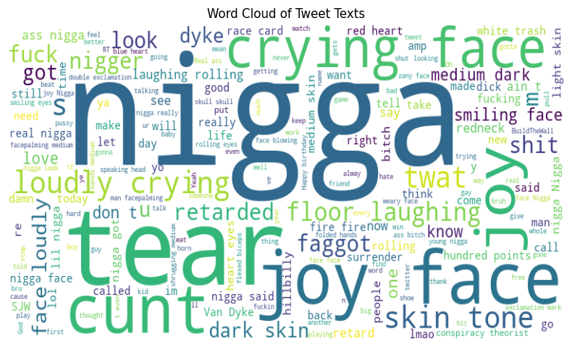

In [ ]:
# Combine labels 1 and 4 in addition to combining 2 and 3
data = {
    'Label': ['Not Hate', 'Identity-based', 'Other Forms', 'Gender & Sexual Orientation'],
    'Count': [
        104598 + 103527 + 103878,   # Label 0
        20914 + 21318 + 21305 + 610 + 1015 + 982, # Label 1 & 4 combined
        10654 + 10490 + 10404,      # Label 5
        7548 + 7754 + 7503 + 5499 + 5715 + 5717   # Label 2 & 3 combined
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the pie chart with combined labels
fig, ax = plt.subplots()

# Custom function to format the label with percentage and count
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plotting the pie chart with both percentage and count
wedges, texts, autotexts = ax.pie(df['Count'], labels=df['Label'], autopct=lambda pct: func(pct, df['Count']),
                                  startangle=55)

# Make the labels and percentages easier to read
plt.setp(autotexts, size=8, weight="bold")

ax.axis('equal')  

plt.show()

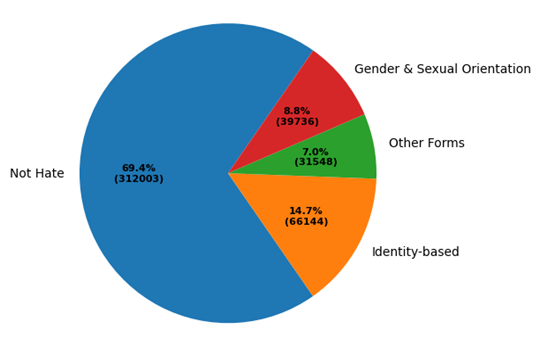